In [2]:
!kaggle competitions download -c nlp-getting-started

# an ongoing competition: build a ML model to predict which tweets are about real natural disasters and which are fake
# data as follows
# id - a unique identifier for each tweet
# text - the text of the tweet
# location - the location the tweet was sent from (may be blank) >>> data cleaning practice for us!!!
# keyword - a particular keyword from the tweet (may be blank) >>> data cleaning practice for us!!!
# target - in train.csv only, whether a tweet is about a real disaster (1) or not (0)

# we could add a source column as social media (like in other fakenews dataset as news?

nlp-getting-started.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
#unzipping the files into the notebook dir
import zipfile as zf

files = zf.ZipFile("nlp-getting-started.zip",'r')
files.extractall()
files.close()

In [4]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
tweet = pd.read_csv('train.csv')
test =pd.read_csv('test.csv')
tweet.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [16]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [18]:
tweet.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [26]:
# keyword and location have some missing values,but we probably won't need them
# text and real/fake classification are 100 percent
# we could add a source column as social media (like in other fakenews dataset as news)
# does not have title like other datasets
tweet.isnull()

,id,keyword,location,text,target
0,False,True,True,False,False
1,False,True,True,False,False
2,False,True,True,False,False
3,False,True,True,False,False
4,False,True,True,False,False
...,...,...,...,...,...
7608,False,True,True,False,False
7609,False,True,True,False,False
7610,False,True,True,False,False
7611,False,True,True,False,False


In [9]:
# extracting the number of examples of each class 1 is real, 0 is fake
Real_len = tweet[tweet['target'] == 1].shape[0]
Fake_len = tweet[tweet['target'] == 0].shape[0]

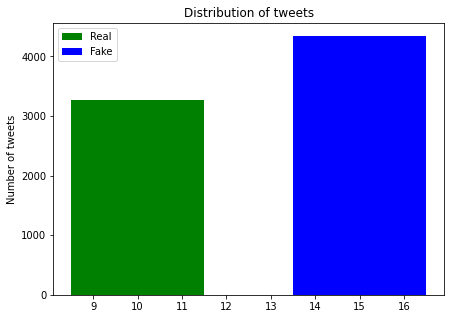

In [12]:
# bar plot of the classification and the distribution between real and fake data
plt.rcParams['figure.figsize'] = (7, 5)
plt.bar(10,Real_len,3, label="Real", color='green')
plt.bar(15,Fake_len,3, label="Fake", color='blue')
plt.legend()
plt.ylabel('Number of tweets')
plt.title('Distribution of tweets')
plt.show()

In [ ]:
#EDA - char, word plus sentence analysis 


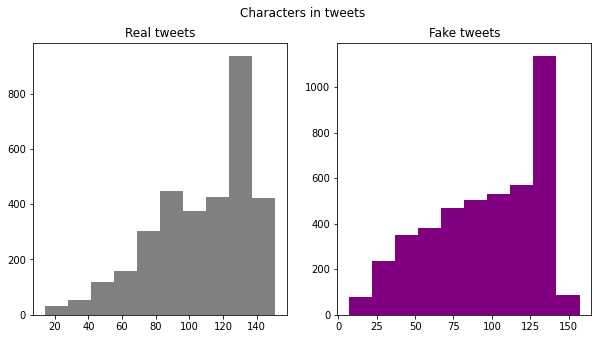

In [20]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=tweet[tweet['target']==1]['text'].str.len()
ax1.hist(tweet_len,color='grey')
ax1.set_title('Real tweets')
tweet_len=tweet[tweet['target']==0]['text'].str.len()
ax2.hist(tweet_len,color='purple')
ax2.set_title('Fake tweets')
fig.suptitle('Characters in tweets')
plt.show()

#almost identical 

In [ ]:
#Number of words in a tweet >
# other analysis: common words, avarege word length, punctuation, stopwords...etc.

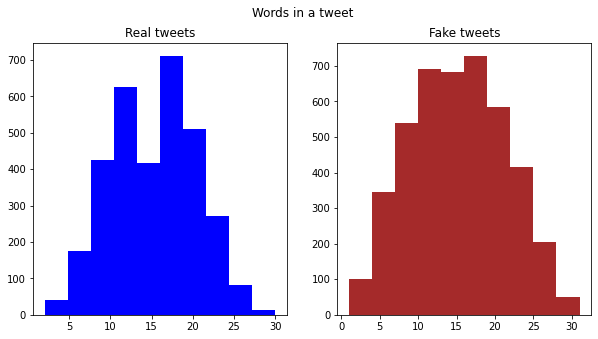

In [22]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=tweet[tweet['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='blue')
ax1.set_title('Real tweets')
tweet_len=tweet[tweet['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='brown')
ax2.set_title('Fake tweets')
fig.suptitle('Words in a tweet')
plt.show()